In [1]:
from Scripts import eegAnalysis
import numpy as np
from matplotlib import pyplot as plt
import pickle 
from itertools import product

In [2]:
## Setup
directory = 'E:\PhD\FEF_PUBLIC'
with open(fr'{directory}\Data\pre_sessions.pkl', 'rb') as f:
    pre_sessions = pickle.load(f)
with open(fr'{directory}\Data\post_sessions.pkl', 'rb') as f:
    post_sessions = pickle.load(f)
subj_keys = ['S1', 'S2', 'S3', 'S4', 'S5']
data_splits = ['Choice', 'RT', 'Prev_Choice', 'Prev_RT', 'Rep']
polarities = ['AN', 'CA']
averaging_types = ['Group', 'Individual', 'Session']

In [ ]:
eegAnalysis.plotPermutationAnalysis(averaging_type = 'Group', subj_keys = subj_keys, data_splits = data_splits, 
                                    polarities = polarities, directory = directory)


In [ ]:
eegAnalysis.plotPermutationAnalysis(averaging_type = 'Individual', subj_keys = subj_keys, data_splits = data_splits, 
                                    polarities = polarities, directory = directory)


In [ ]:
eegAnalysis.plotPermutationAnalysis(averaging_type = 'Session', subj_keys = subj_keys, data_splits = data_splits, 
                                    polarities = polarities, directory = directory)


e:\PhD\FEF_Public\Scripts\eegAnalysis.py:511: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(10,10))


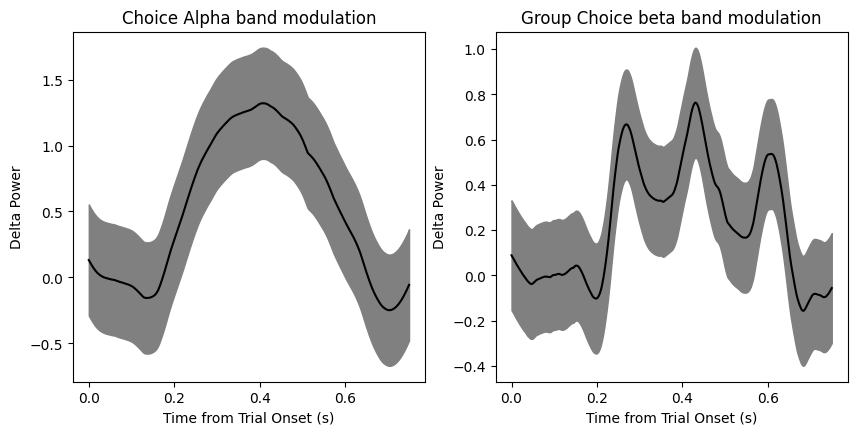

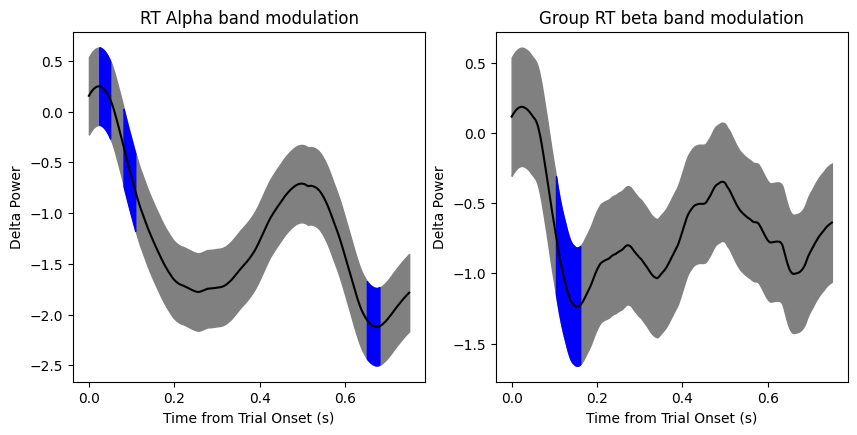

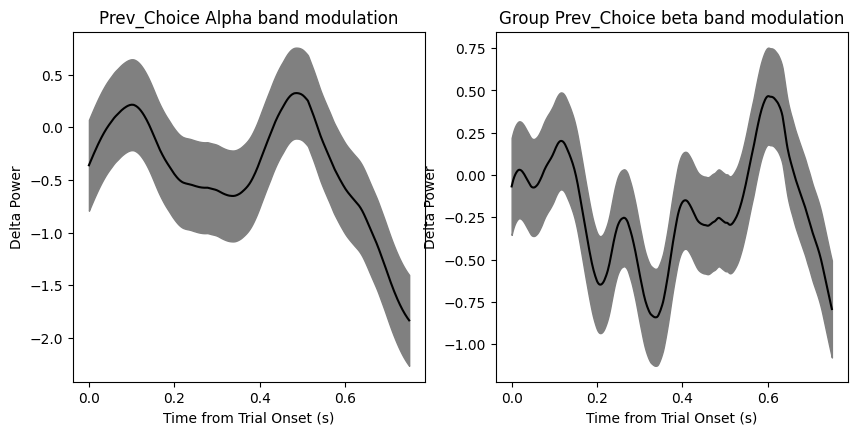

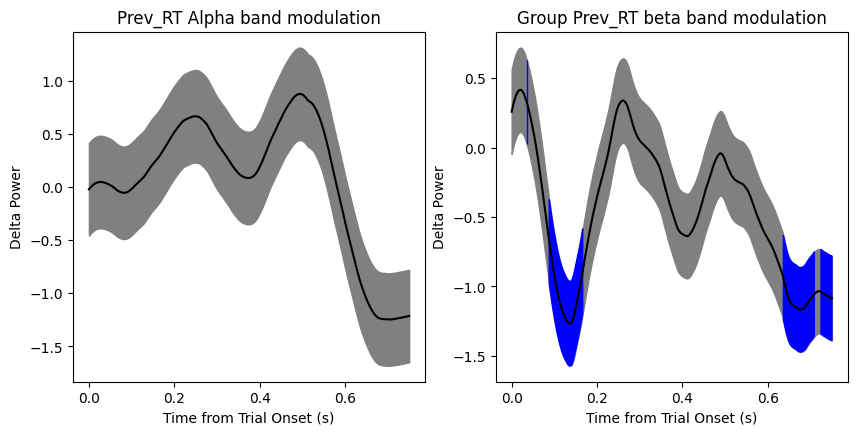

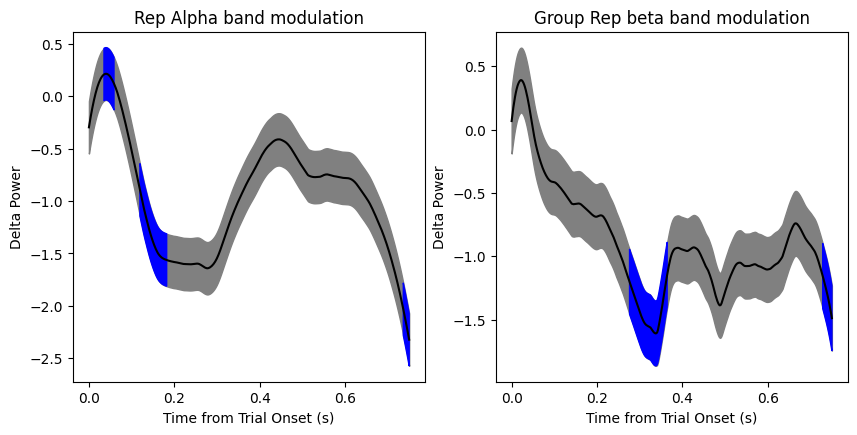

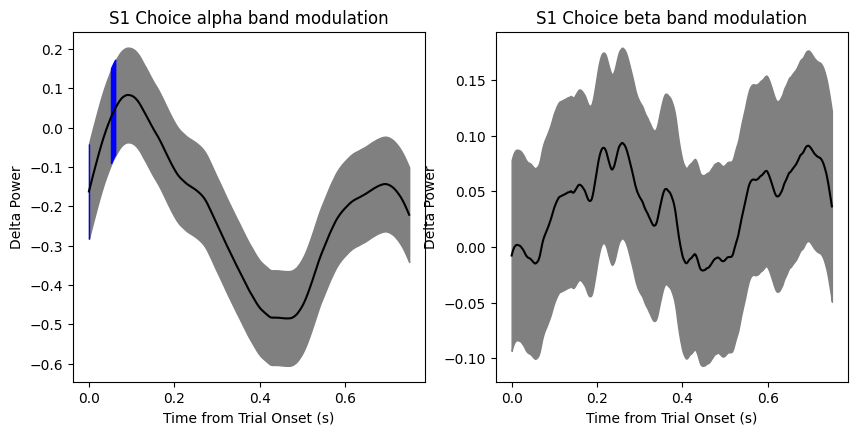

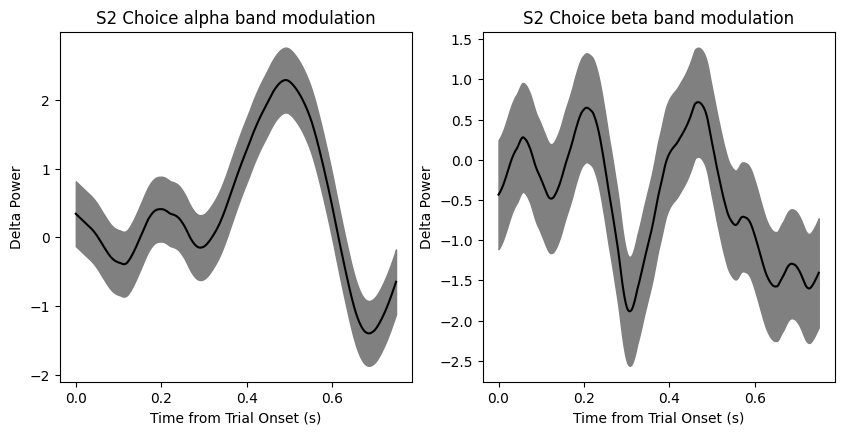

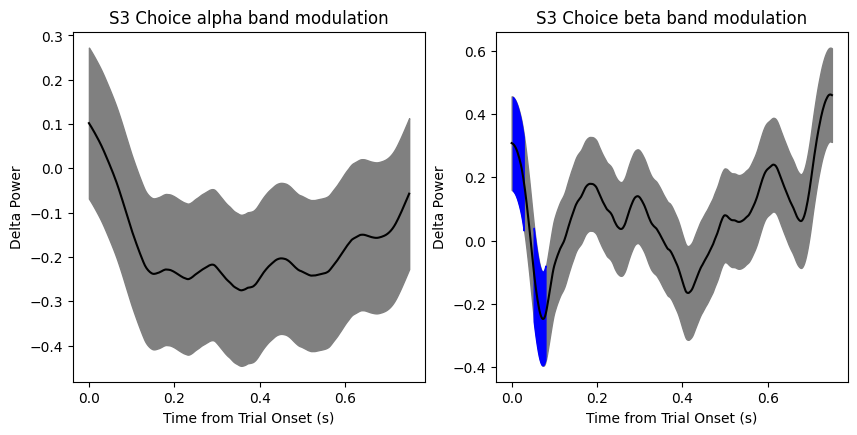

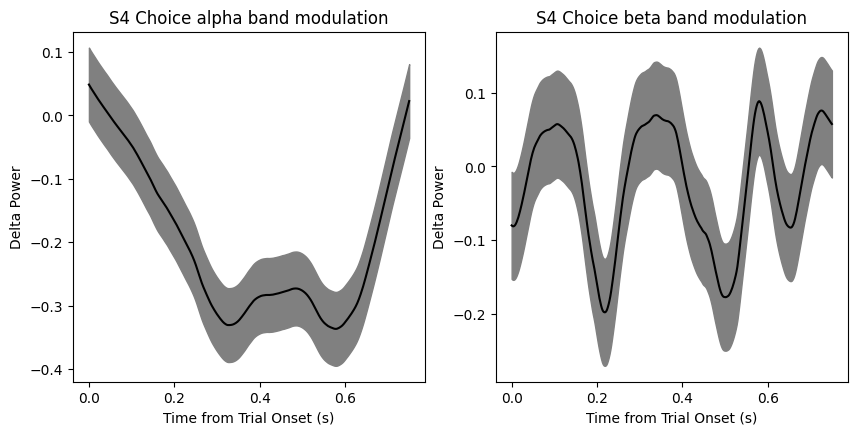

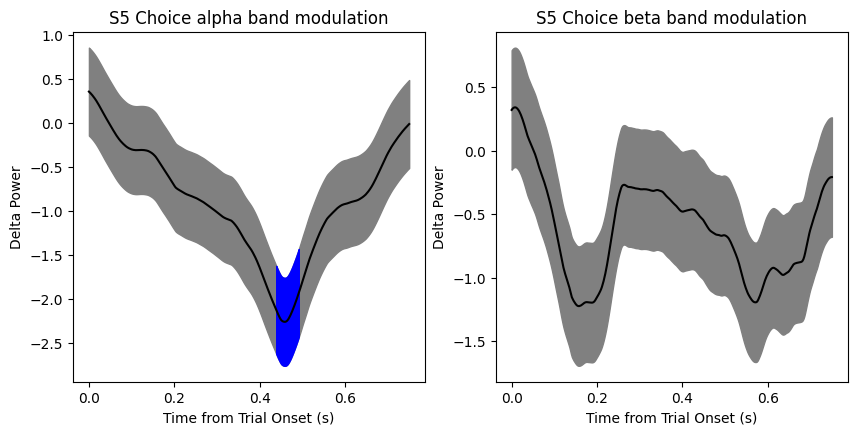

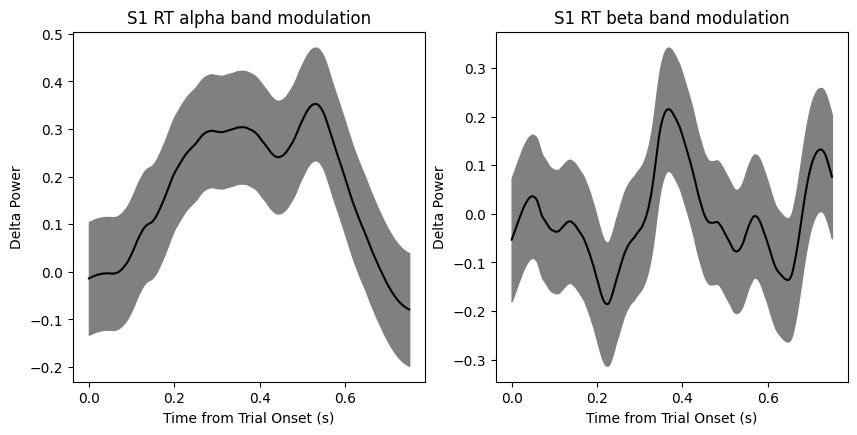

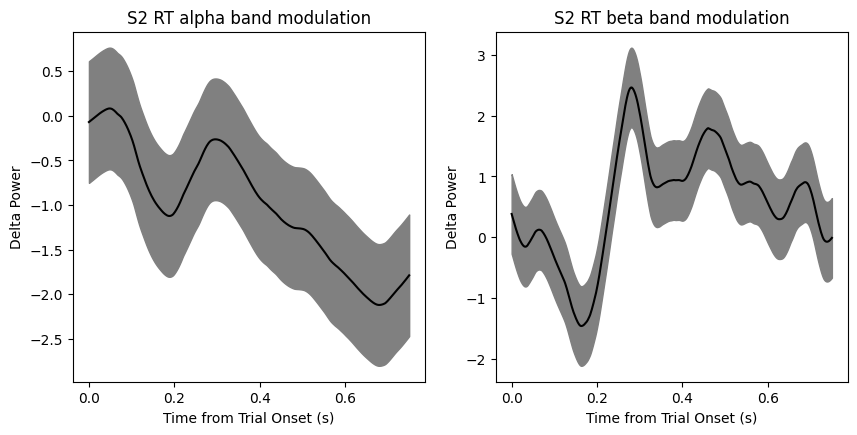

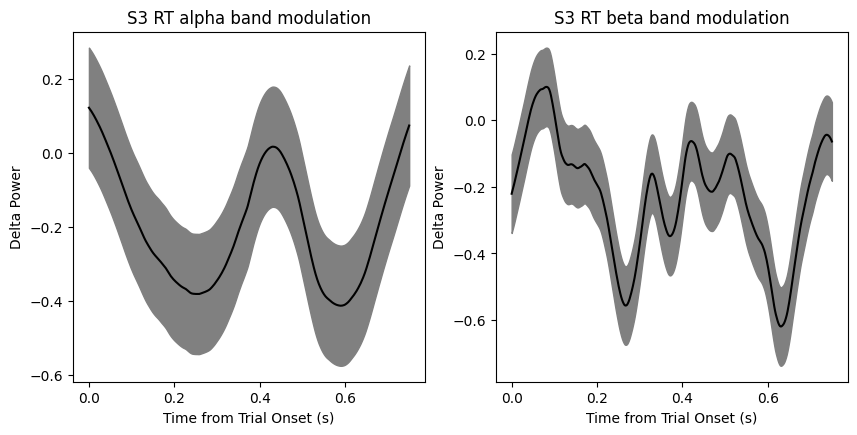

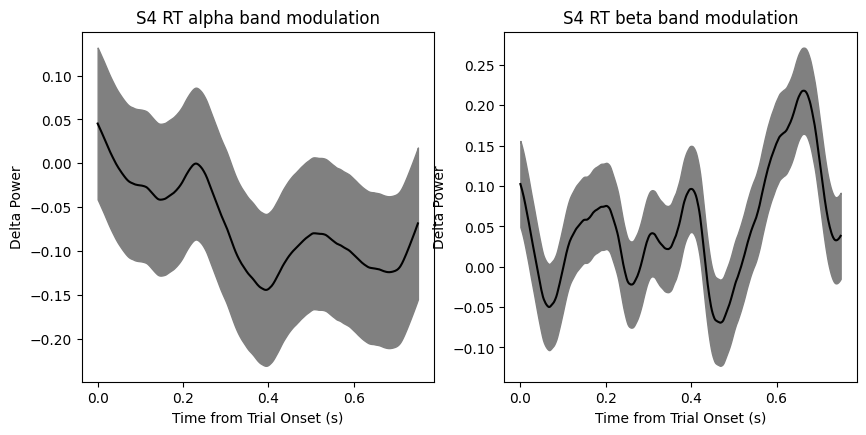

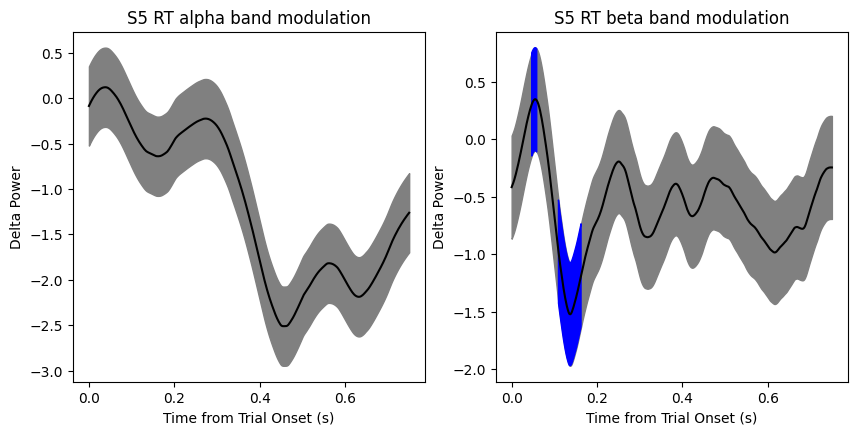

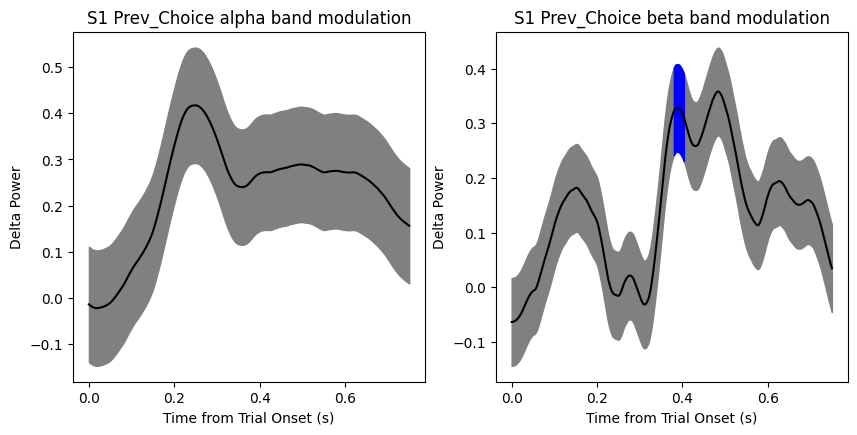

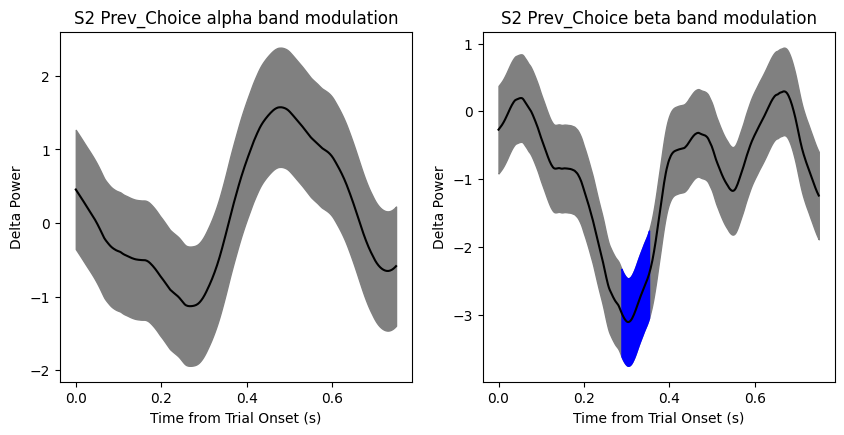

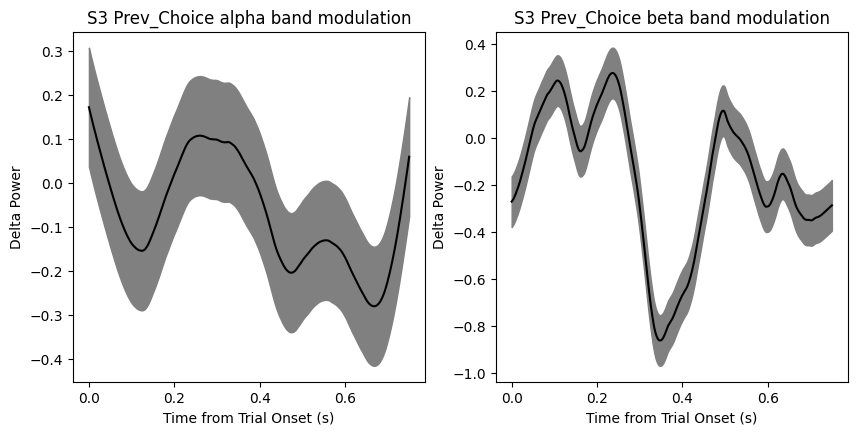

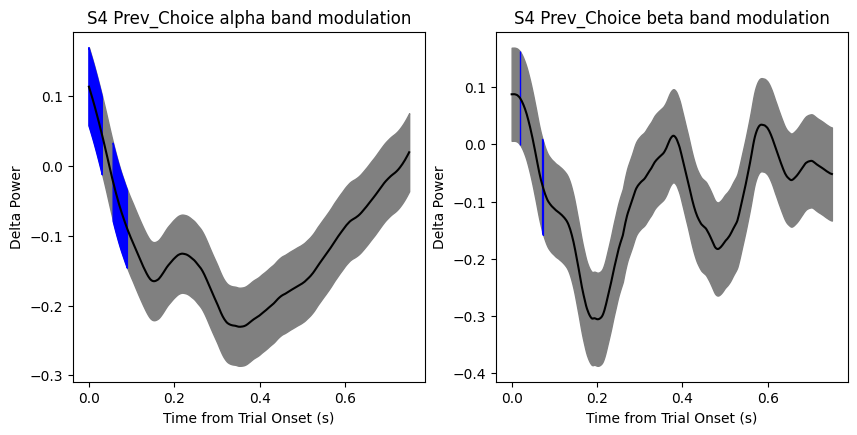

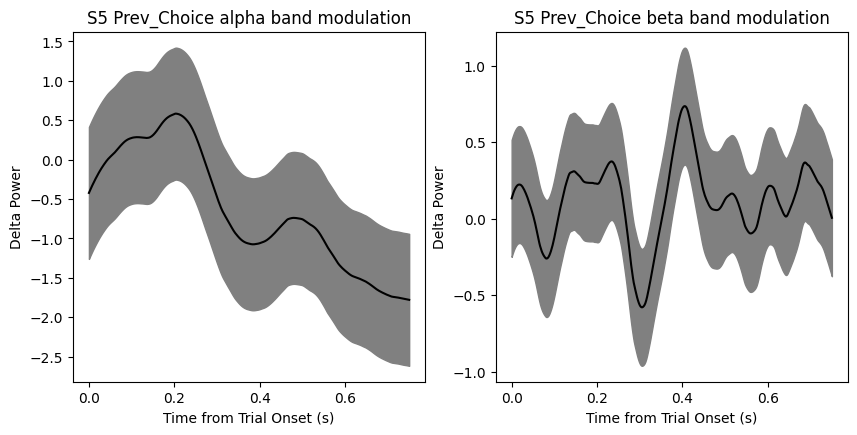

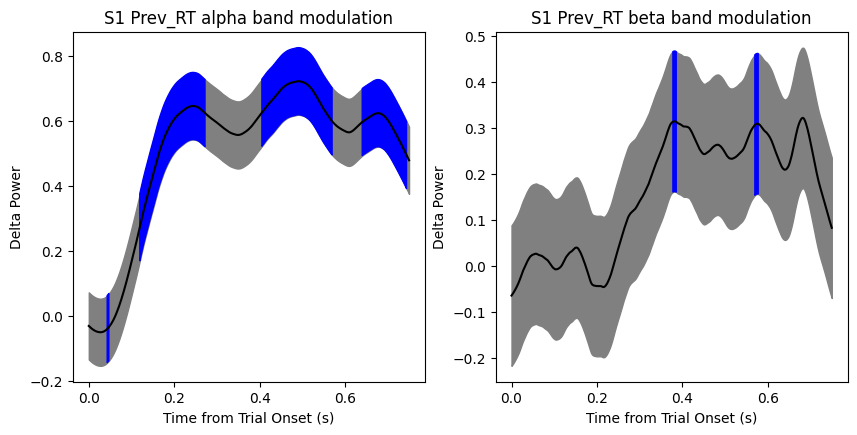

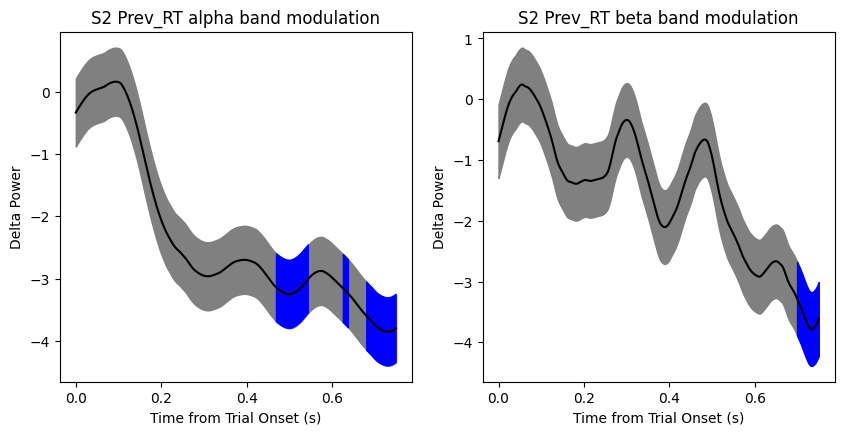

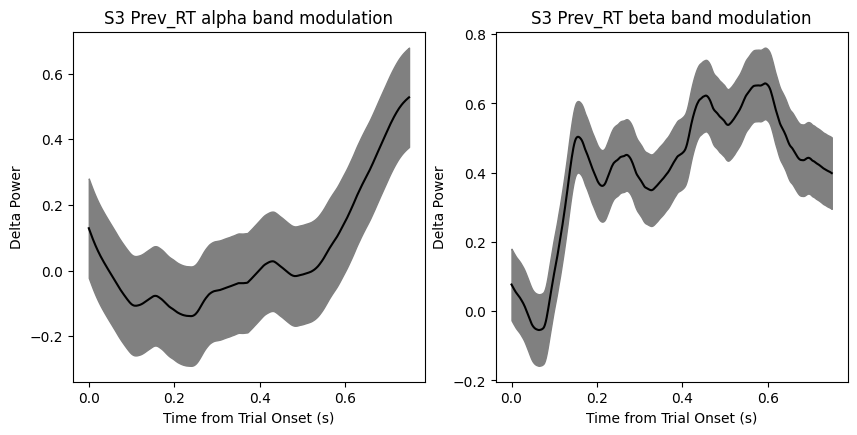

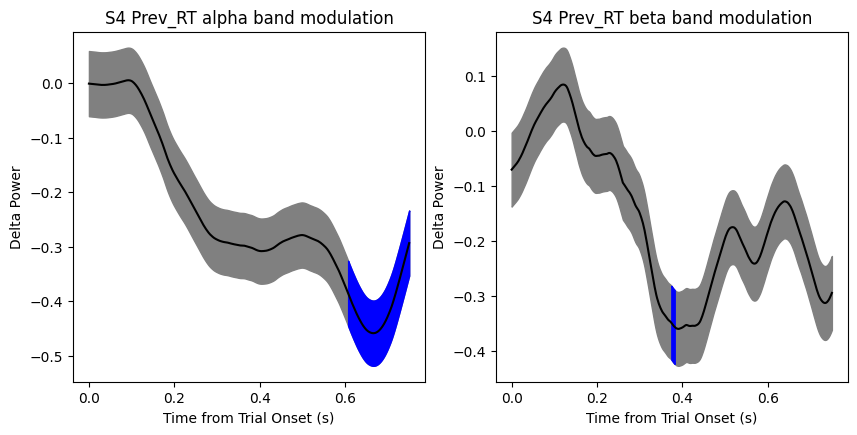

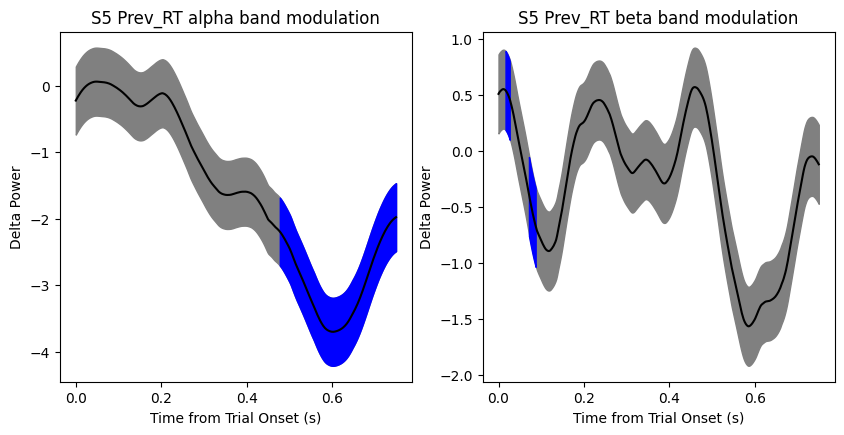

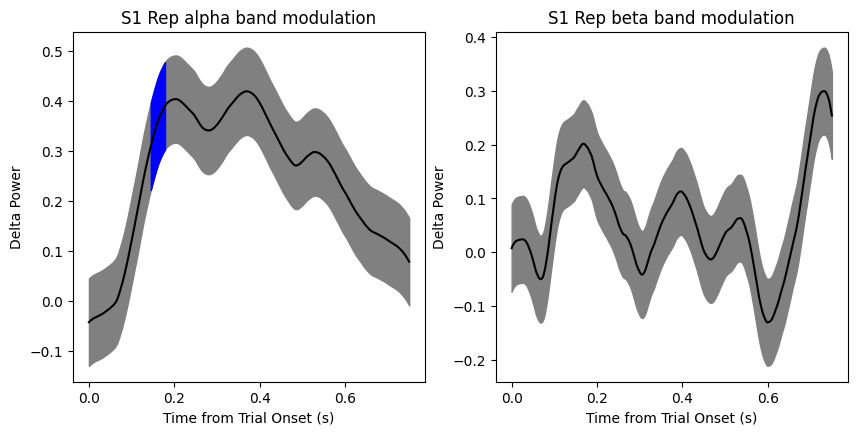

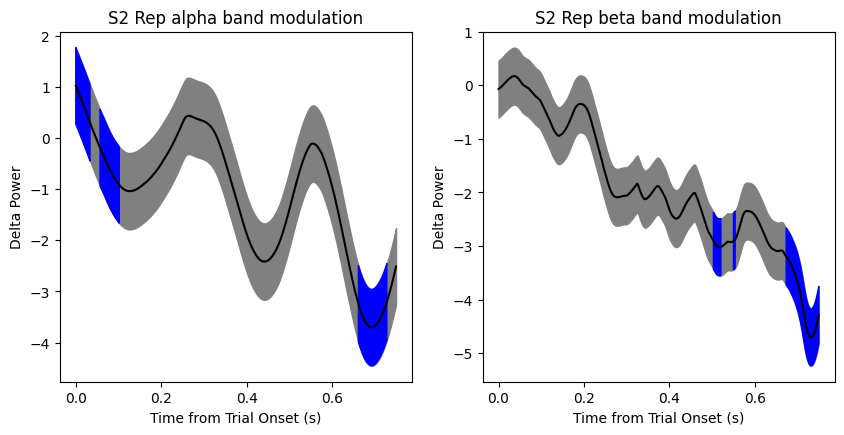

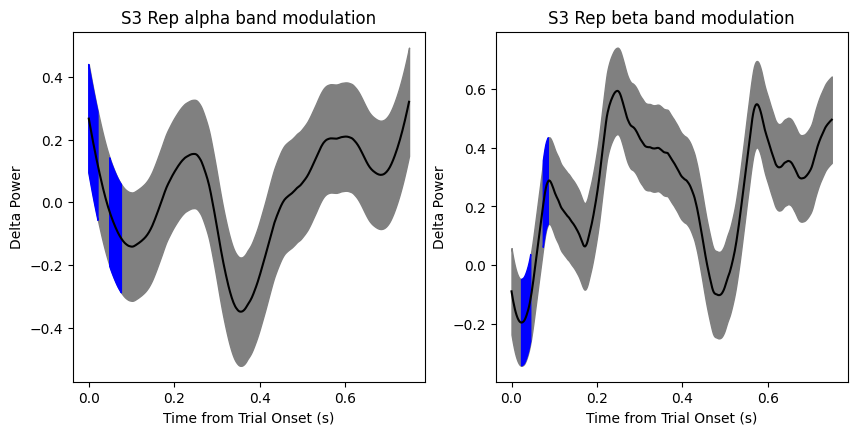

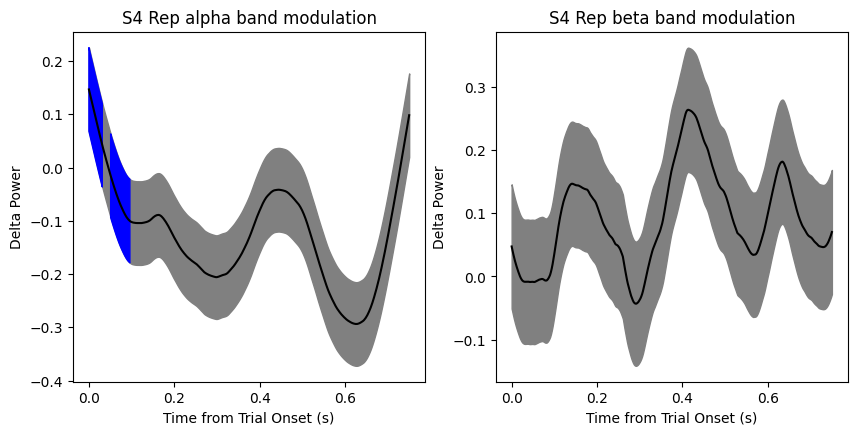

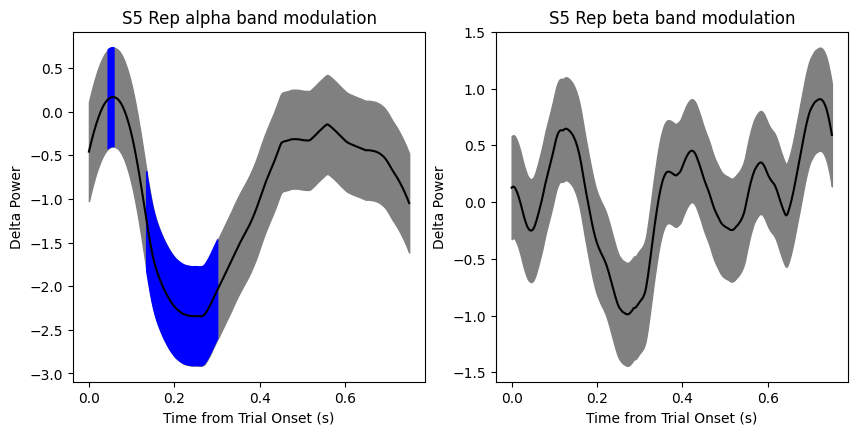

In [ ]:
## Plot Band-specific time courses
eegAnalysis.plotBandTimeCourse(averaging_type = 'Group', subj_keys = subj_keys, data_splits = data_splits, directory = directory)


In [ ]:
eegAnalysis.plotBandTimeCourse(averaging_type = 'Individual', subj_keys = subj_keys, data_splits = data_splits, directory = directory)


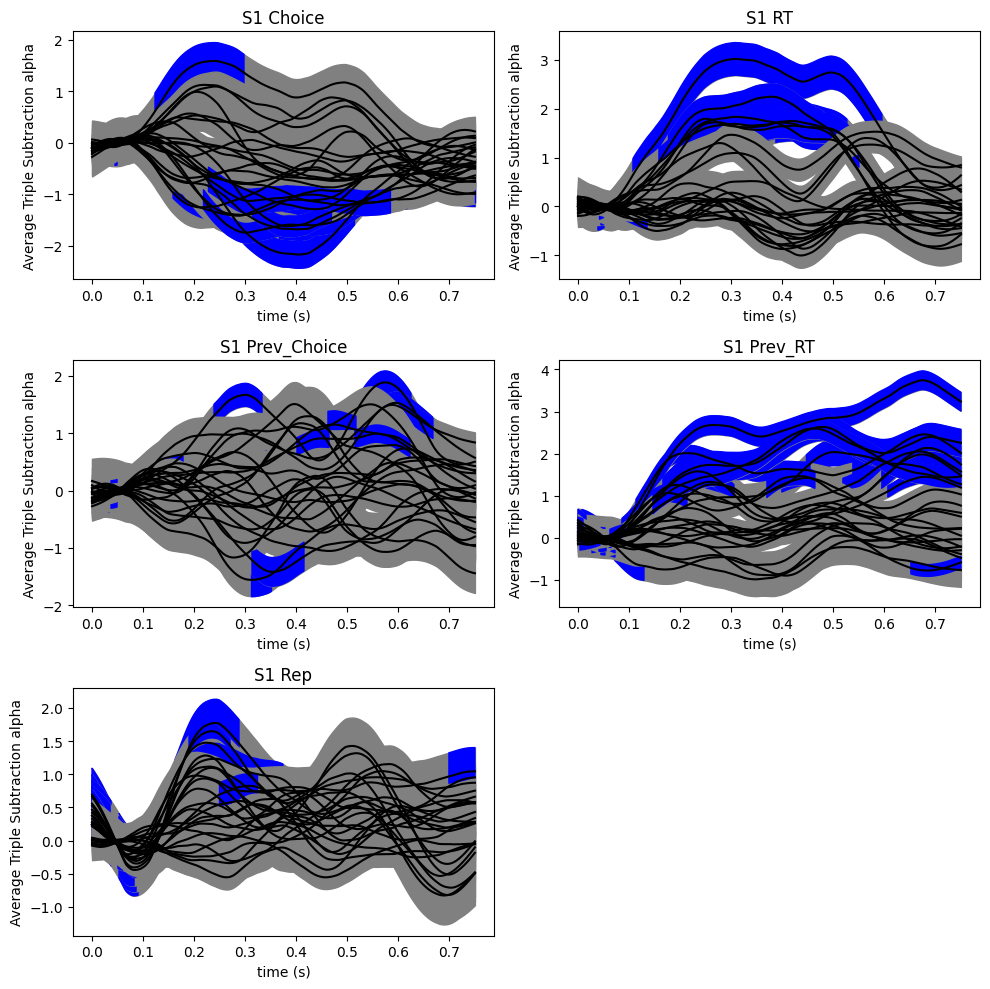

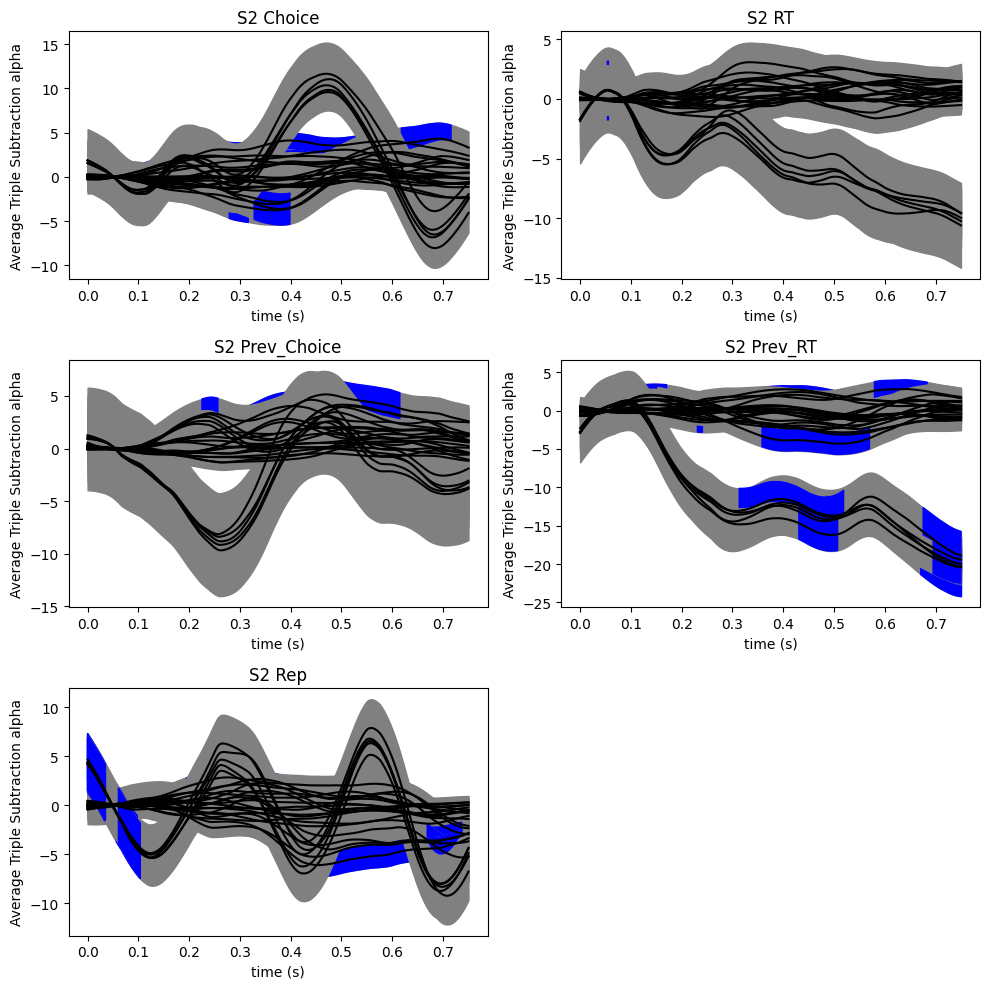

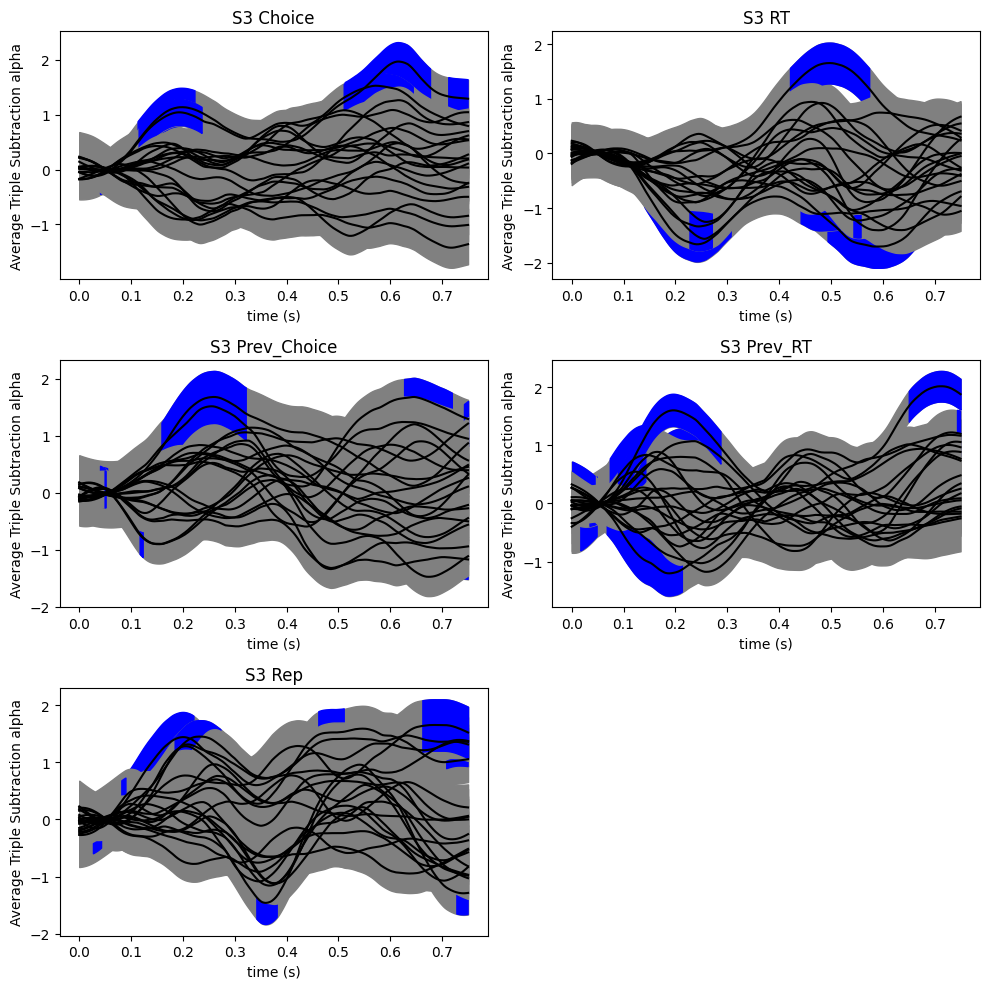

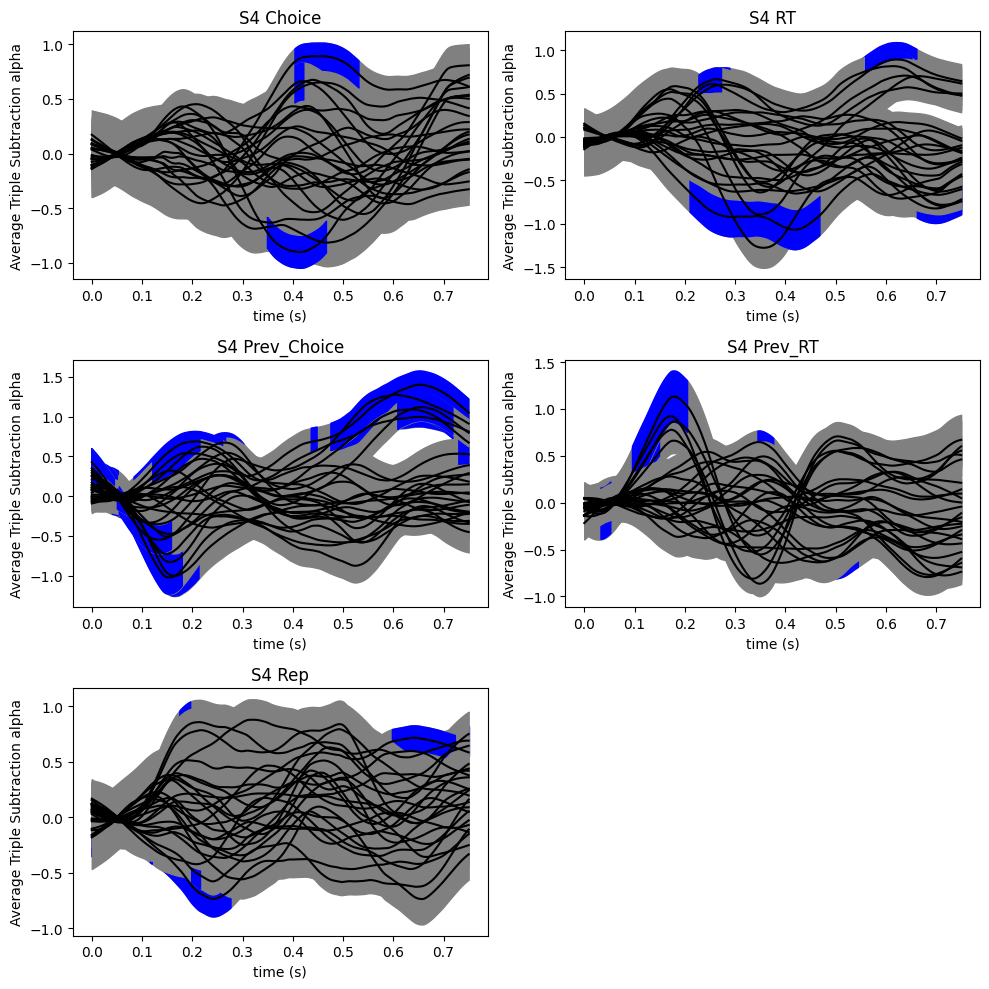

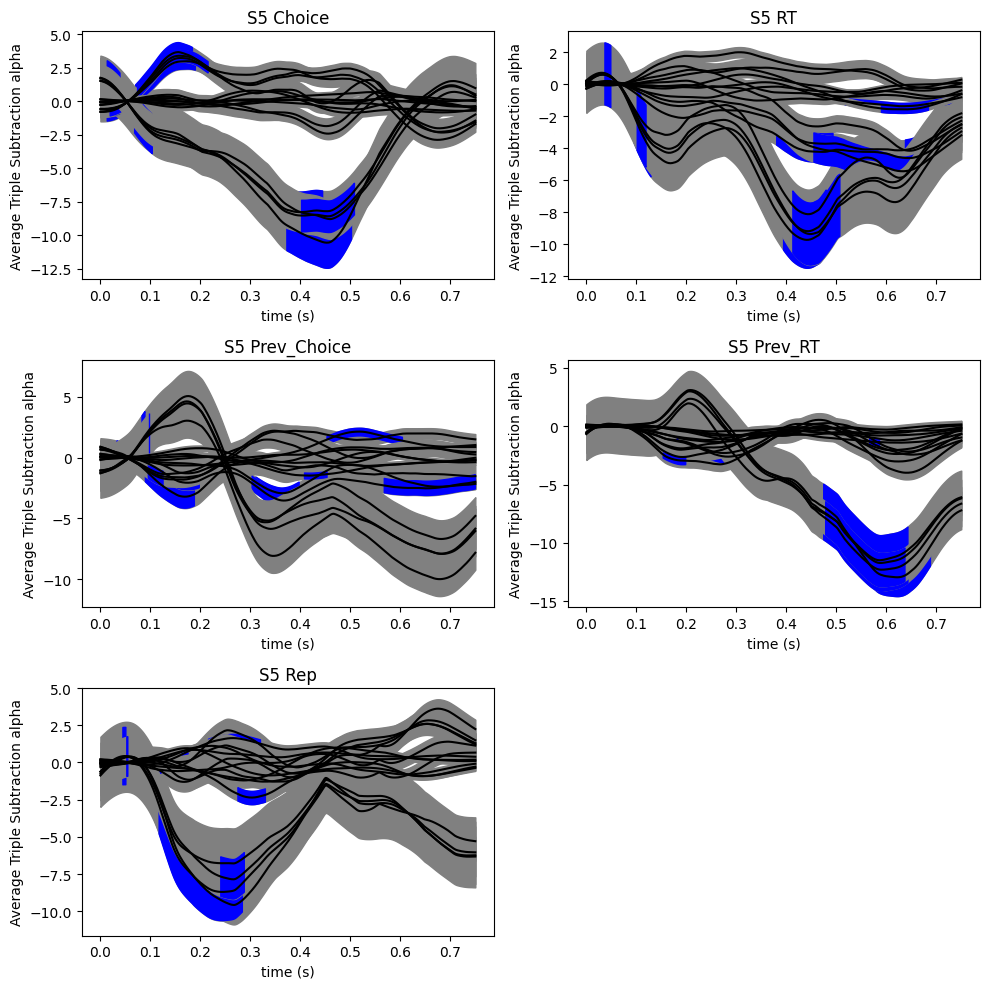

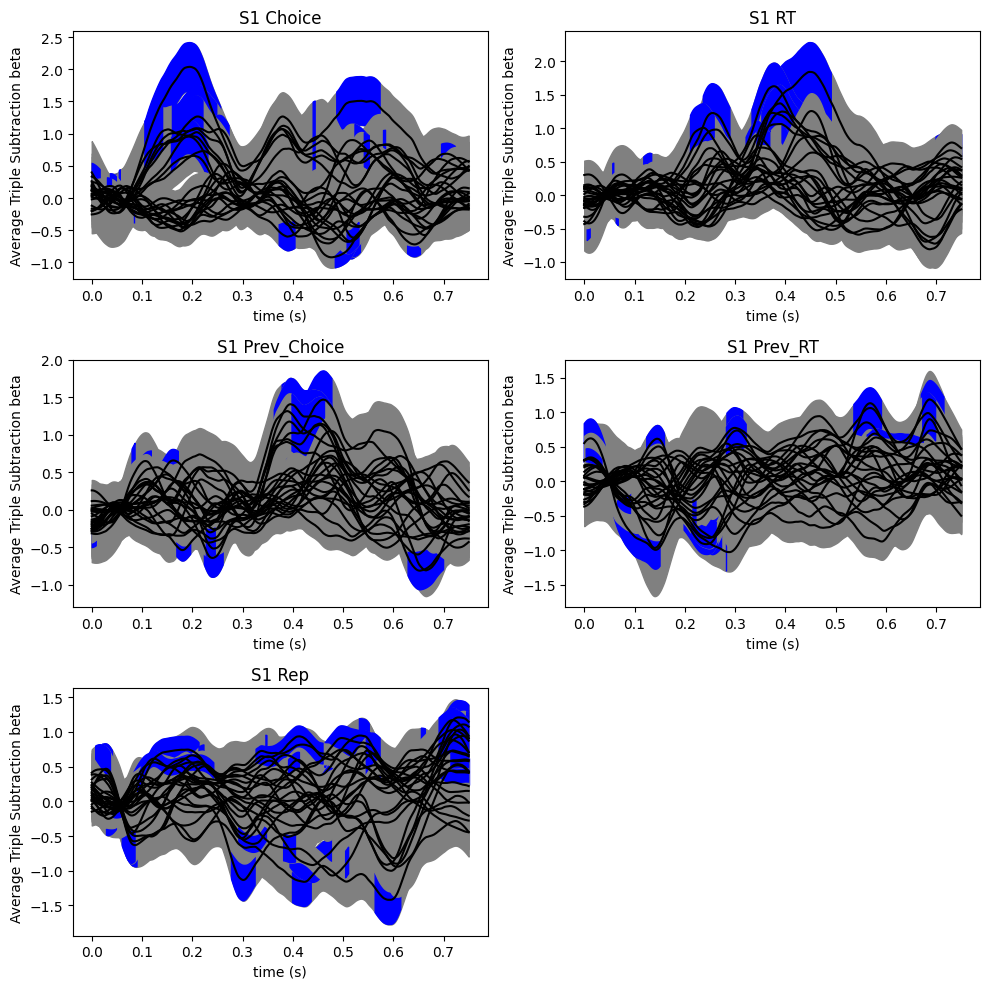

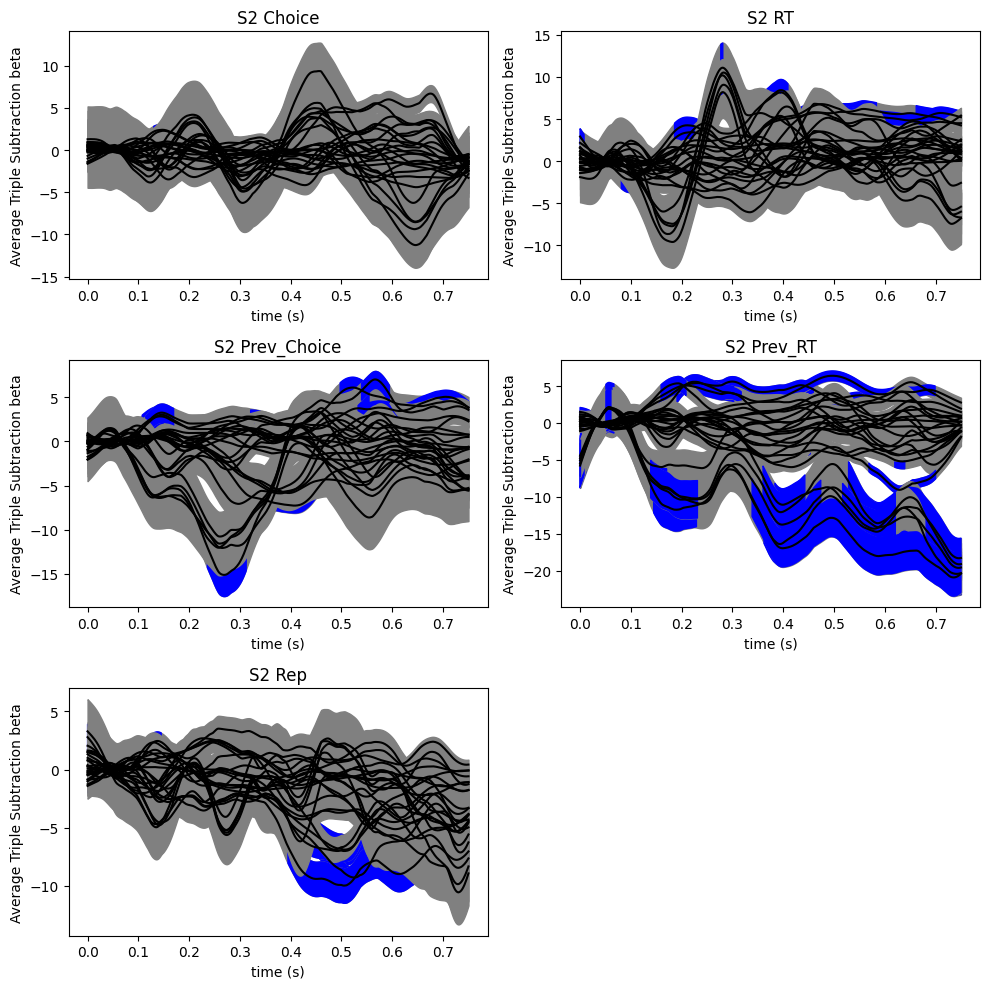

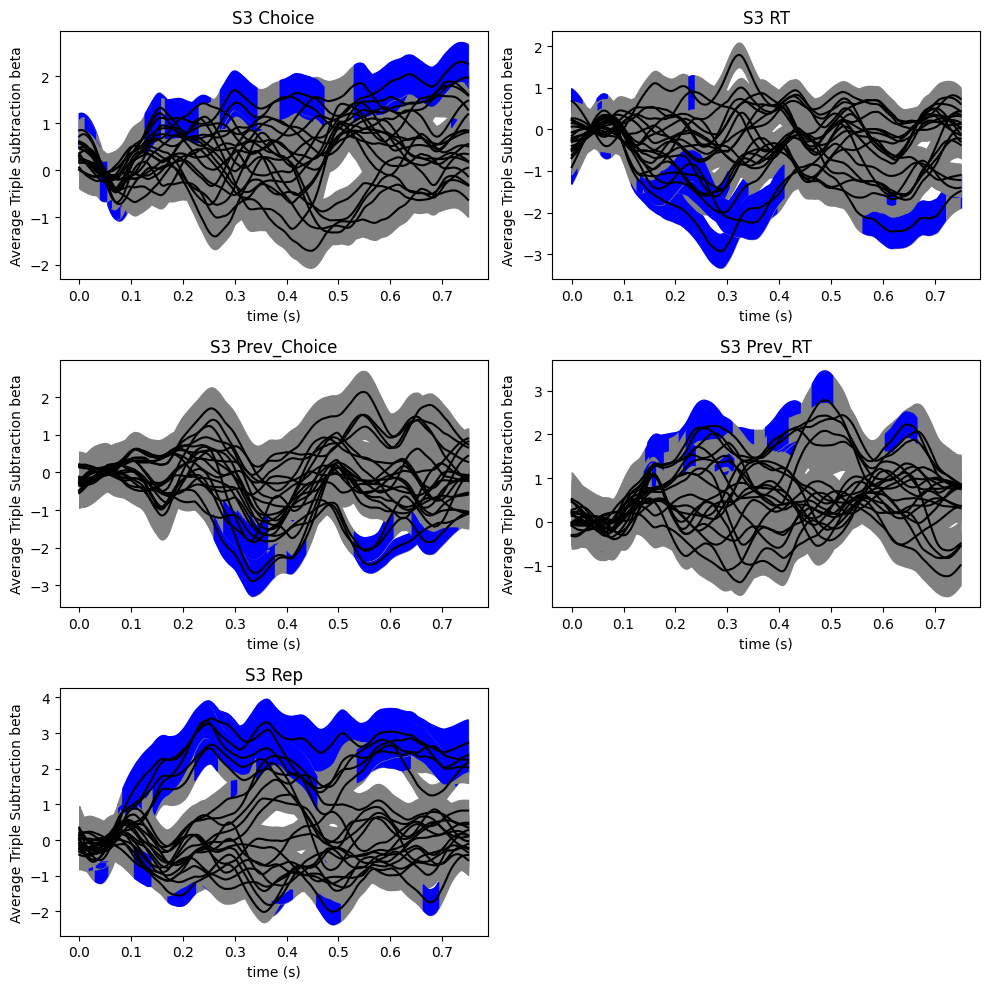

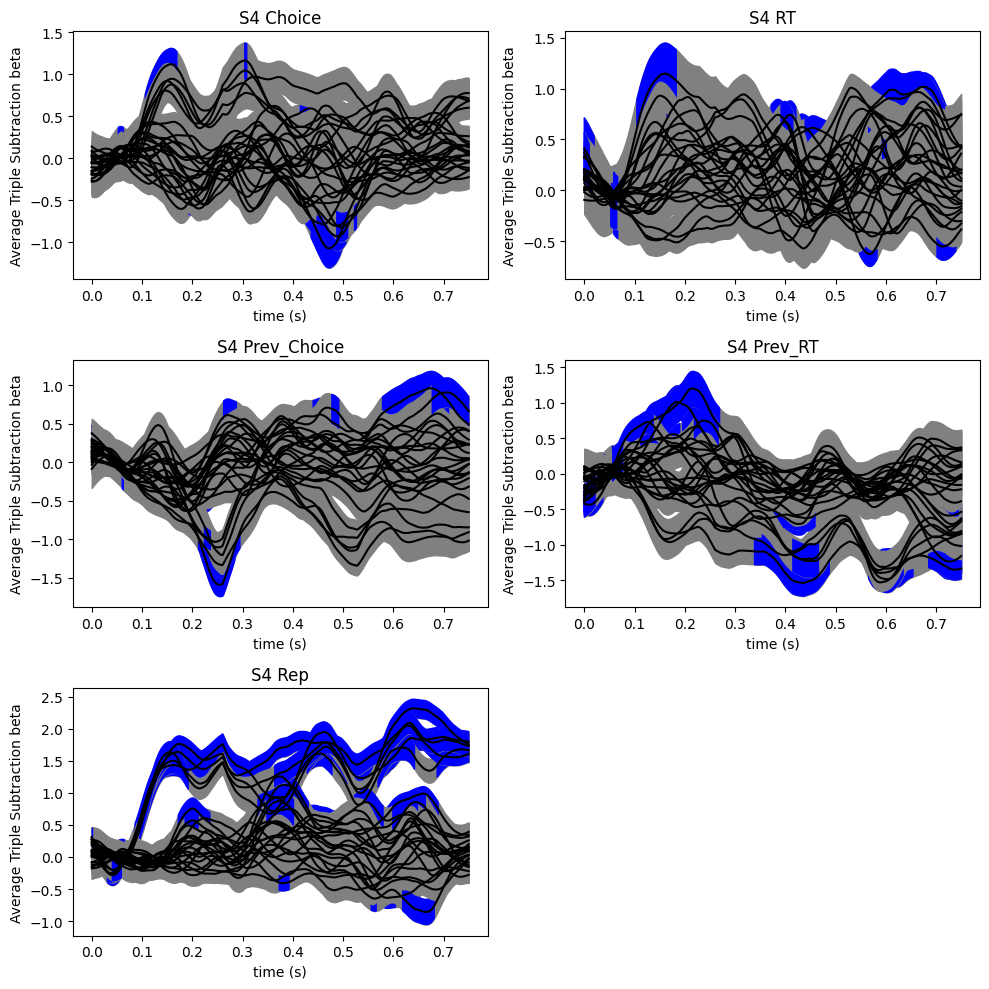

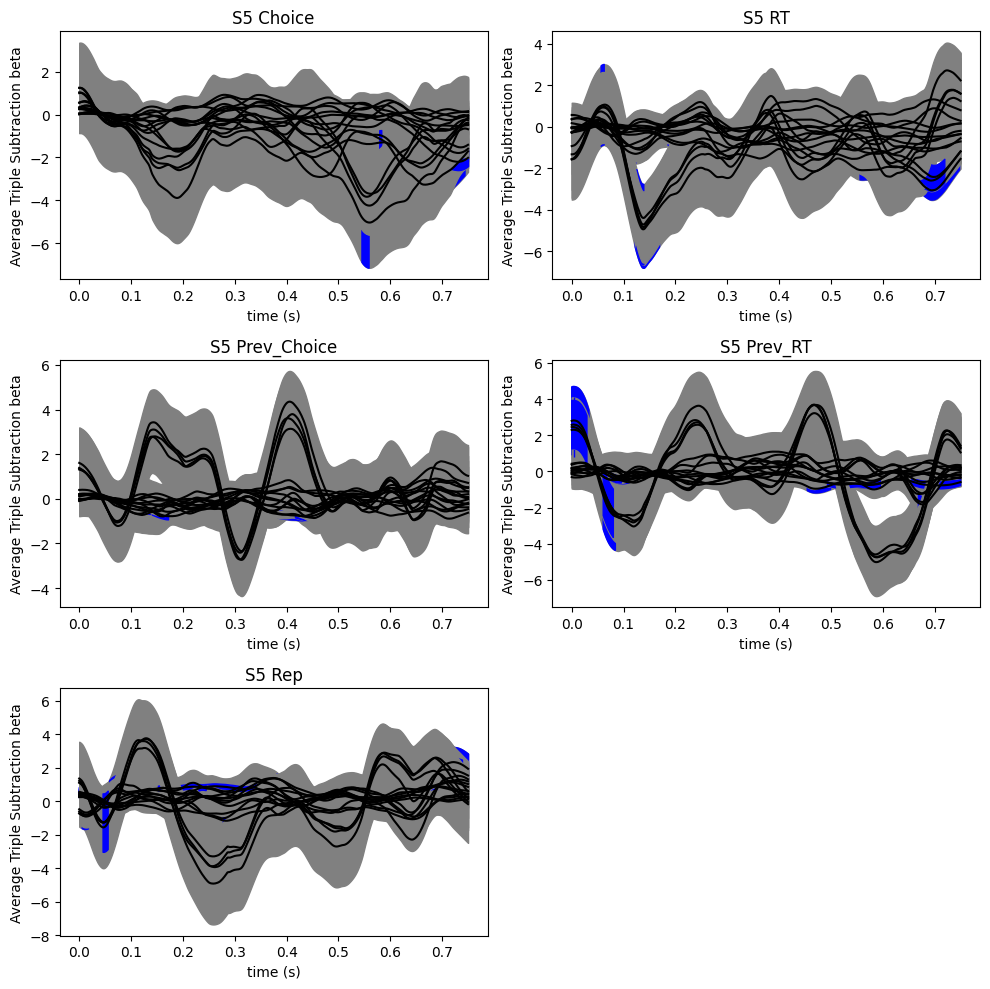

In [ ]:
## Plot all combinations alpha band
eeg_directory = fr'{directory}\Data\EEG Permutations'
subplot = 221 
alpha = [5, 6]
beta = [15, 16]
t = np.linspace(0, .75, 384)
freqs = np.linspace(4, 30, 25)
p = eegAnalysis.sidakCorrection(alpha = .05, m = t.shape[0])

for subj in subj_keys:

    fig = plt.figure(figsize=(10,10))
    anodal_dates = pre_sessions[subj]['AN'].keys()
    cathodal_dates = pre_sessions[subj]['CA'].keys()
    combinations = list(product(anodal_dates, cathodal_dates))

    for plotnum, data_type in enumerate(data_splits):

        fig.add_subplot(321 + plotnum)

        for combnum, _ in enumerate(combinations):

            true = np.load(fr'{directory}/Data/EEG Permutations/{subj}_session_combination_{combnum}_{data_type}_true.npy')
            sig = np.load(fr'{directory}/Data/EEG Permutations/{subj}_session_combination_{combnum}_{data_type}_sig.npy')
            null = np.load(fr'{directory}/Data/EEG Permutations/{subj}_session_combination_{combnum}_{data_type}_null.npy')
            plt.plot(t, np.mean(true[alpha[0]:alpha[1], :], axis = 0), 'k-')
            plt.fill_between(t, np.mean(true[alpha[0]:alpha[1], :], axis = 0) - np.std(null[alpha[0]:alpha[1], :]),
                            np.mean(true[alpha[0]:alpha[1], :], axis = 0) + np.std(null[alpha[0]:alpha[1], :]), color = 'grey')
            sig[sig>p] = np.nan
            true[np.isnan(sig)] = np.nan
            plt.fill_between(t, np.mean(true[alpha[0]:alpha[1], :], axis = 0) - np.std(null[alpha[0]:alpha[1], :]),
                            np.mean(true[alpha[0]:alpha[1], :], axis = 0) + np.std(null[alpha[0]:alpha[1], :]), color = 'blue')

        plt.title(f'{subj} {data_type}')
        plt.xlabel('time (s)')
        plt.ylabel('Average Triple Subtraction alpha')
    
    fig.tight_layout()
    

for subj in subj_keys:

    fig = plt.figure(figsize=(10,10))
    anodal_dates = pre_sessions[subj]['AN'].keys()
    cathodal_dates = pre_sessions[subj]['CA'].keys()
    combinations = list(product(anodal_dates, cathodal_dates))

    for plotnum, data_type in enumerate(data_splits):

        fig.add_subplot(321 + plotnum)

        for combnum, _ in enumerate(combinations):

            true = np.load(fr'{directory}/Data/EEG Permutations/{subj}_session_combination_{combnum}_{data_type}_true.npy')
            sig = np.load(fr'{directory}/Data/EEG Permutations/{subj}_session_combination_{combnum}_{data_type}_sig.npy')
            null = np.load(fr'{directory}/Data/EEG Permutations/{subj}_session_combination_{combnum}_{data_type}_null.npy')
            plt.plot(t, np.mean(true[beta[0]:beta[1], :], axis = 0), 'k-')
            plt.fill_between(t, np.mean(true[beta[0]:beta[1], :], axis = 0) - np.std(null[beta[0]:beta[1], :]),
                            np.mean(true[beta[0]:beta[1], :], axis = 0) + np.std(null[beta[0]:beta[1], :]), color = 'grey')
            sig[sig>p] = np.nan
            true[np.isnan(sig)] = np.nan
            plt.fill_between(t, np.mean(true[beta[0]:beta[1], :], axis = 0) - np.std(null[beta[0]:beta[1], :]),
                            np.mean(true[beta[0]:beta[1], :], axis = 0) + np.std(null[beta[0]:beta[1], :]), color = 'blue')

        plt.title(f'{subj} {data_type}')
        plt.xlabel('time (s)')
        plt.ylabel('Average Triple Subtraction beta')

    fig.tight_layout()

